# Introduction to scvi-tools

In [2]:
!pip install --quiet scvi-colab
from scvi_colab import install

install()

INFO     scvi-colab: Installing scvi-tools.                                                                        
INFO     scvi-colab: Install successful. Testing import.                                                           


In [3]:
import os
import tempfile

import scanpy as sc
import scvi
import seaborn as sns
import torch

In [4]:
scvi.settings.seed = 0
print("scvi-tools version:", scvi.__version__)

INFO: Seed set to 0
INFO:lightning.fabric.utilities.seed:Seed set to 0


scvi-tools version: 1.1.5


In [5]:
sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme()
torch.set_float32_matmul_precision("high")
save_dir = tempfile.TemporaryDirectory()

%config InlineBackend.print_figure_kwargs={"facecolor": "w"}
%config InlineBackend.figure_format="retina"

In [6]:
adata = scvi.data.heart_cell_atlas_subsampled(save_path=save_dir.name)
adata

INFO     Downloading file at /tmp/tmp08r_dg6y/hca_subsampled_20k.h5ad                                              
Downloading...: 100%|██████████| 65714/65714.0 [00:00<00:00, 241113.65it/s]


AnnData object with n_obs × n_vars = 18641 × 26662
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45', 'n_counts'
    uns: 'cell_type_colors'

In [6]:
adata.to_df()

,AL627309.1,AC114498.1,AL669831.2,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.7,AL645608.1,SAMD11,...,MAFIP,AC011043.1,AC011043.2,AL592183.1,AC007325.4,AC007325.2,BX072566.1,AL354822.1,AC004556.1,AC240274.1
AACTCCCCACGAGAGT-1-HCAHeart7844001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATAACGCAGAGCTGGT-1-HCAHeart7829979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTCAAGTCATGCCACG-1-HCAHeart7702879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GGTGATTCAAATGAGT-1-HCAHeart8102858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGAGAATTCTTAGCAG-1-HCAHeart8102863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGTCAGGCAAGGCTCC-1-HCAHeart7985087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGTCACAAGACGAGCT-1-H0035_RV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GGTGAAGGTTCCACAA-1-HCAHeart7844001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAGCTAAGTACAGACG-1-HCAHeart7702876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
adata.obs

,NRP,age_group,cell_source,cell_type,donor,gender,n_counts,n_genes,percent_mito,percent_ribo,region,sample,scrublet_score,source,type,version,cell_states,Used
AACTCCCCACGAGAGT-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Myeloid,D6,Male,1420.0,738,0.054930,0.064789,LA,HCAHeart7844001,0.113475,CD45+,DCD,V2,LYVE1+MØ1,Yes
ATAACGCAGAGCTGGT-1-HCAHeart7829979,No,70-75,Sanger-Nuclei,Ventricular_Cardiomyocyte,D4,Female,844.0,505,0.001185,0.001185,RV,HCAHeart7829979,0.085546,Nuclei,DCD,V2,vCM1,Yes
GTCAAGTCATGCCACG-1-HCAHeart7702879,Yes,60-65,Sanger-Nuclei,Fibroblast,D2,Male,1491.0,862,0.000000,0.005366,RA,HCAHeart7702879,0.197861,Nuclei,DCD,V2,FB2,Yes
GGTGATTCAAATGAGT-1-HCAHeart8102858,Yes,60-65,Sanger-CD45,Endothelial,D11,Female,2167.0,1115,0.064144,0.027227,LA,HCAHeart8102858,0.113475,CD45+,DCD,V3,EC10_CMC-like,Yes
AGAGAATTCTTAGCAG-1-HCAHeart8102863,Yes,60-65,Sanger-Cells,Endothelial,D11,Female,7334.0,2505,0.093537,0.040496,RA,HCAHeart8102863,0.132150,Cells,DCD,V3,EC5_art,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGTCAGGCAAGGCTCC-1-HCAHeart7985087,No,55-60,Sanger-Nuclei,Ventricular_Cardiomyocyte,D3,Male,4478.0,2243,0.002233,0.001340,RV,HCAHeart7985087,0.185751,Nuclei,DBD,V2,vCM1,Yes
AGTCACAAGACGAGCT-1-H0035_RV,No,45-50,Harvard-Nuclei,Pericytes,H7,Female,967.0,630,0.002068,0.004137,RV,H0035_RV,0.081779,Nuclei,DBD,V3,PC1_vent,Yes
GGTGAAGGTTCCACAA-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Lymphoid,D6,Male,1599.0,619,0.041901,0.155722,LA,HCAHeart7844001,0.074830,CD45+,DCD,V2,CD4+T_tem,Yes
CAGCTAAGTACAGACG-1-HCAHeart7702876,Yes,60-65,Sanger-Nuclei,Atrial_Cardiomyocyte,D2,Male,3715.0,1523,0.000269,0.002423,LA,HCAHeart7702876,0.048649,Nuclei,DCD,V2,aCM3,Yes


In [7]:
sc.pp.filter_genes(adata, min_cells=3)  # remove genes with less than 3 cells

In [8]:
adata.layers["counts"] = adata.X.copy()  # preserve counts
sc.pp.normalize_total(adata, target_sum=1e4)  # normalize to 10,000 counts
sc.pp.log1p(adata)  # log transform
adata.raw = adata  # freeze the state in `.raw`

In [9]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=1200,
    subset=True,
    layer="counts",
    flavor="seurat_v3",
)

In [10]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts",
    categorical_covariate_keys=["cell_source", "donor"],
    continuous_covariate_keys=["percent_mito", "percent_ribo"]
)

In [11]:
model = scvi.model.SCVI(adata)

In [12]:
model

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [13]:
model.train()

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [08:36<00:00,  1.38s/it, v_num=1, train_loss_step=297, train_loss_epoch=275]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [08:36<00:00,  1.29s/it, v_num=1, train_loss_step=297, train_loss_epoch=275]


In [14]:
adata

AnnData object with n_obs × n_vars = 18641 × 1200
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45', 'n_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cell_type_colors', 'log1p', 'hvg', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'

In [15]:
SCVI_LATENT_KEY = "X_scVI"

latent = model.get_latent_representation()
adata.obsm[SCVI_LATENT_KEY] = latent
latent.shape

(18641, 10)

In [16]:
latent

array([[ 0.833273  ,  0.1254891 , -0.78287274, ..., -1.3530194 ,
        -0.49293005,  1.5679945 ],
       [-0.1828606 , -1.4259944 ,  0.01363347, ..., -0.12003317,
        -0.9149915 ,  0.0632075 ],
       [ 0.83385736,  1.4790634 ,  0.6441355 , ..., -0.28420702,
        -0.42820942,  1.5418382 ],
       ...,
       [-0.17781222, -0.85911095,  0.8340976 , ..., -0.43736956,
        -0.09730242, -0.53395617],
       [-0.67425567, -1.0586798 ,  1.2161064 , ..., -0.07025772,
        -0.04657282,  2.1954966 ],
       [-0.65268755, -1.492232  ,  0.5842666 , ...,  0.15871415,
        -0.9214815 ,  2.4878879 ]], dtype=float32)

In [19]:
adata_subset = adata[adata.obs.cell_type == "Fibroblast"]
latent_subset = model.get_latent_representation(adata_subset)
latent_subset.shape

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


(2446, 10)

In [21]:
denoised = model.get_normalized_expression(adata_subset, library_size=1e4)
denoised.iloc[:5, :5]

,ISG15,TNFRSF4,VWA1,AL590822.1,HES5
GTCAAGTCATGCCACG-1-HCAHeart7702879,1.963901,0.058113,1.566598,1.430541,0.008787
GAGTCATTCTCCGTGT-1-HCAHeart8287128,0.667741,0.251234,4.248154,0.061555,0.001466
CCTCTGATCGTGACAT-1-HCAHeart7702881,2.258363,0.144698,1.004868,1.212301,0.008046
CGCCATTCATCATCTT-1-H0035_apex,0.251467,0.076238,1.088585,0.400346,0.001373
TCGTAGAGTAGGACTG-1-H0015_septum,0.125945,0.056122,0.528876,0.233633,0.004596


In [23]:
adata.layers["scvi_normalized"] = model.get_normalized_expression(
    adata, library_size=1e4
)

In [24]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=20)
sc.tl.umap(adata, min_dist=0.3)

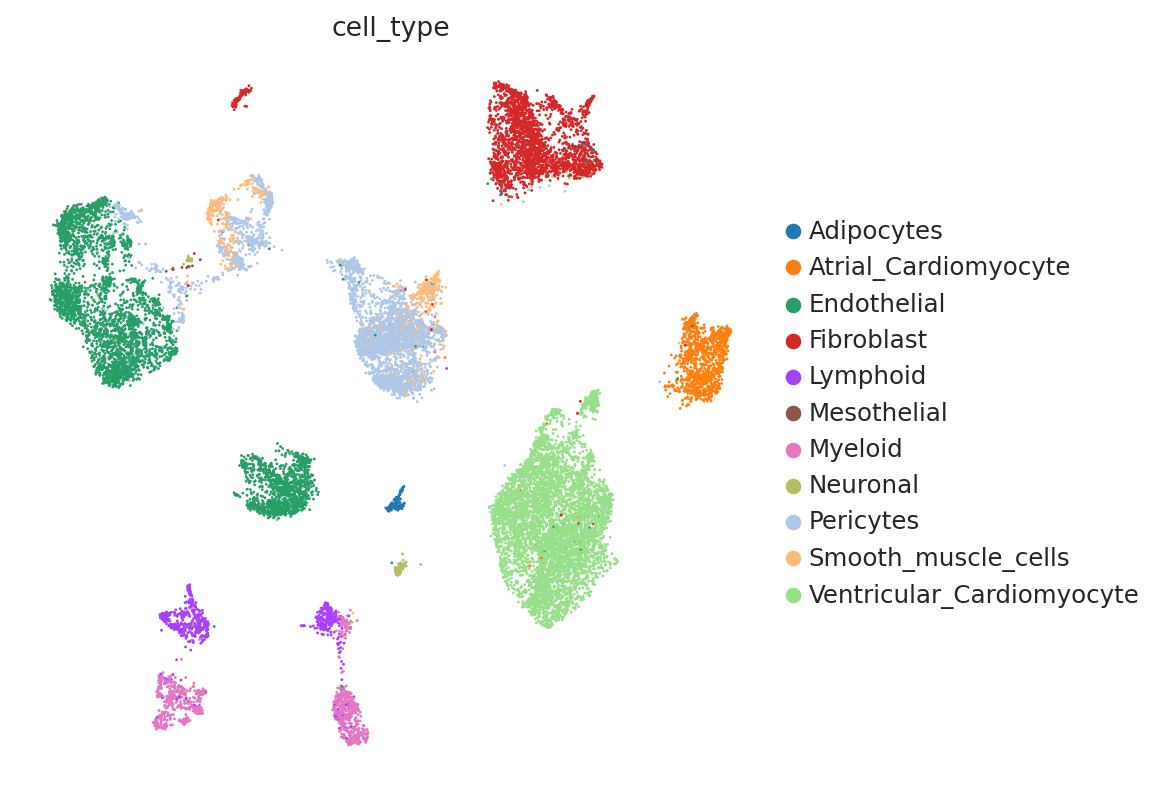

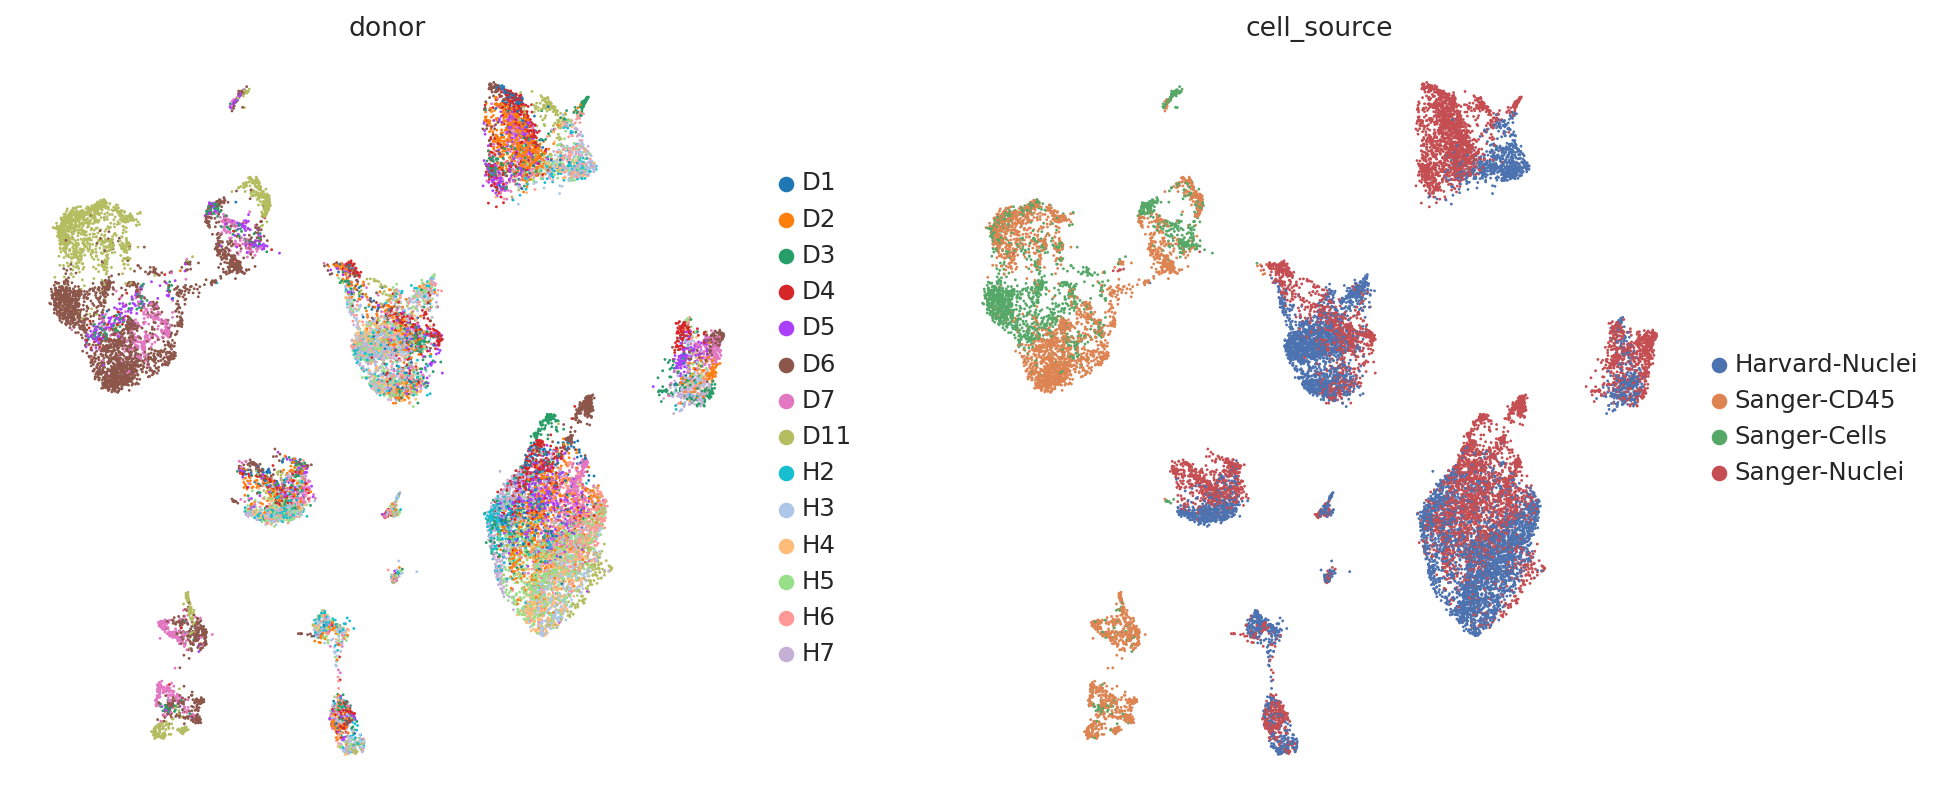

In [25]:
sc.pl.umap(
    adata,
    color=["cell_type"]
)
sc.pl.umap(
    adata,
    color=["donor", "cell_source"],
    ncols=2,
    frameon=False,
)

In [26]:
# use scVI latent space for UMAP generation
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(adata, min_dist=0.3)

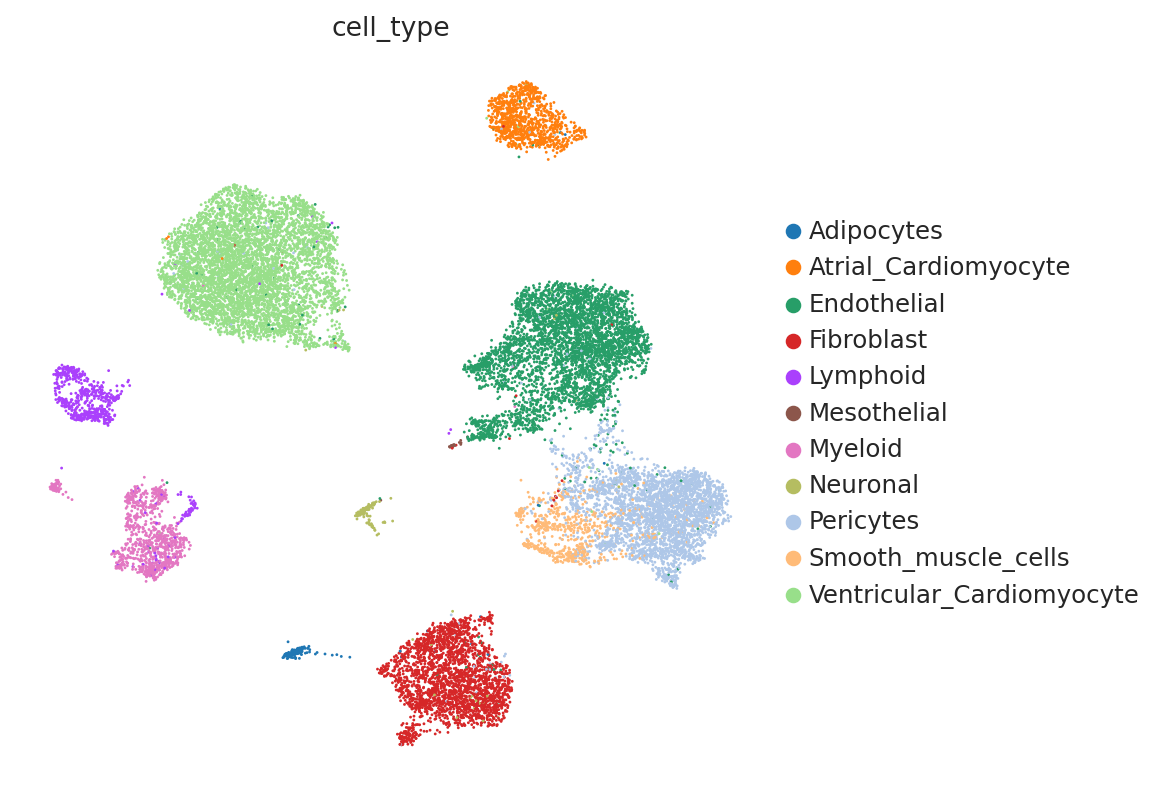

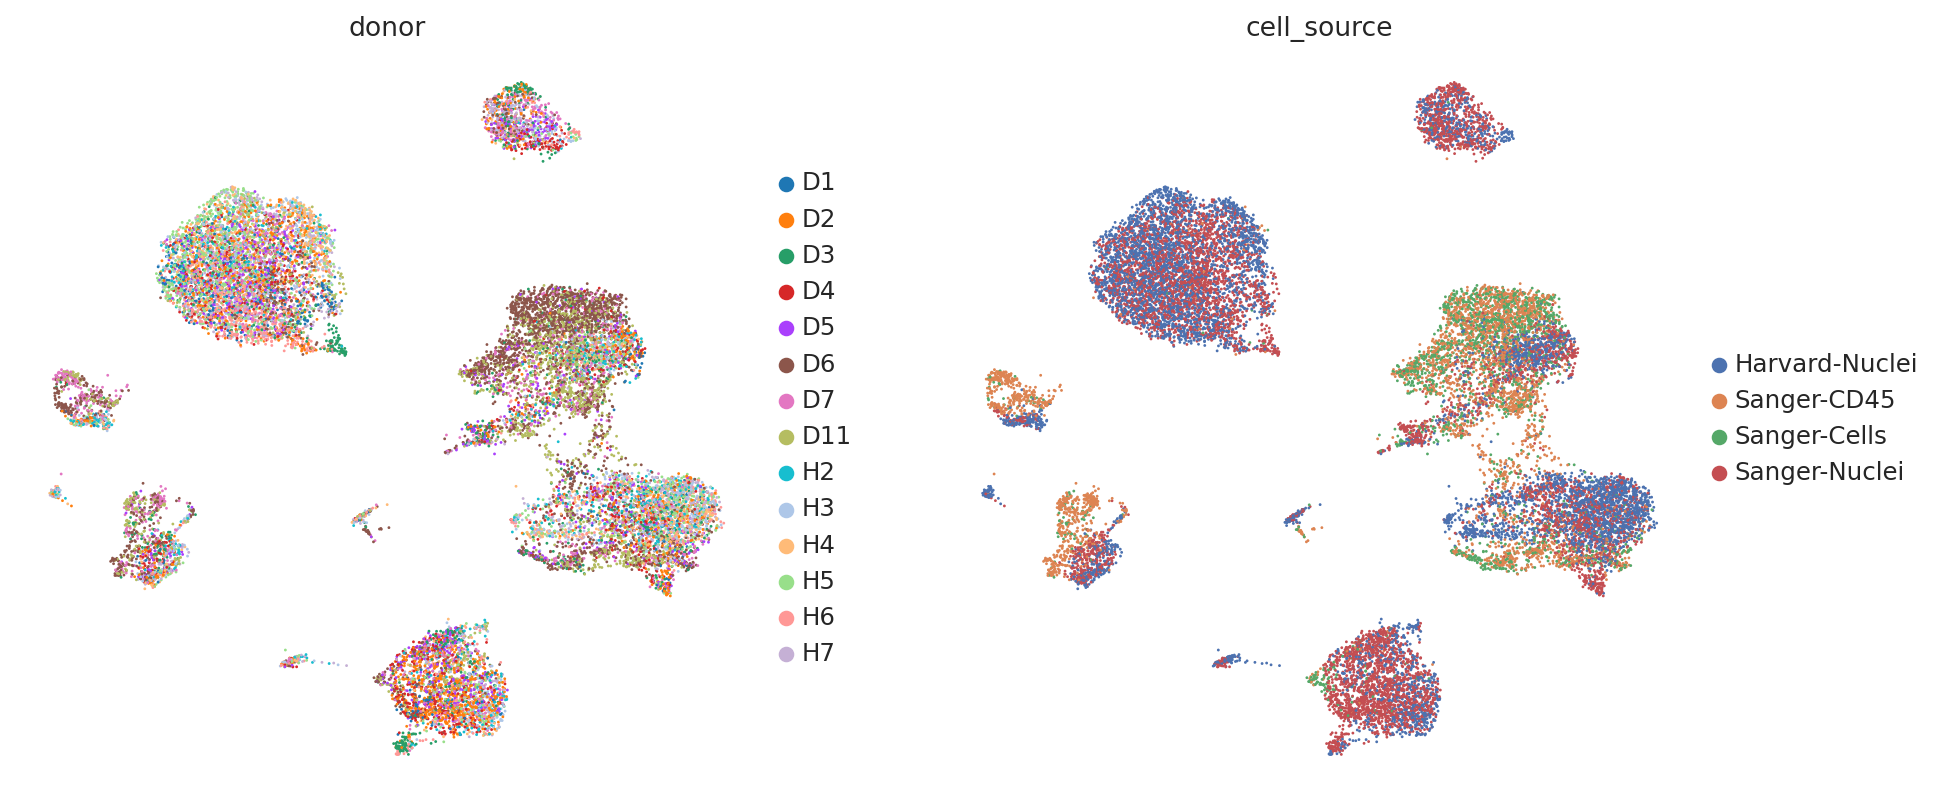

In [27]:
sc.pl.umap(
    adata,
    color=["cell_type"],
    frameon=False,
)
sc.pl.umap(
    adata,
    color=["donor", "cell_source"],
    ncols=2,
    frameon=False,
)

In [28]:
# neighbors were already computed using scVI
SCVI_CLUSTERS_KEY = "leiden_scVI"
sc.tl.leiden(adata, key_added=SCVI_CLUSTERS_KEY, resolution=0.5)

<ipython-input-28-d6606ed23ca9>:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, key_added=SCVI_CLUSTERS_KEY, resolution=0.5)


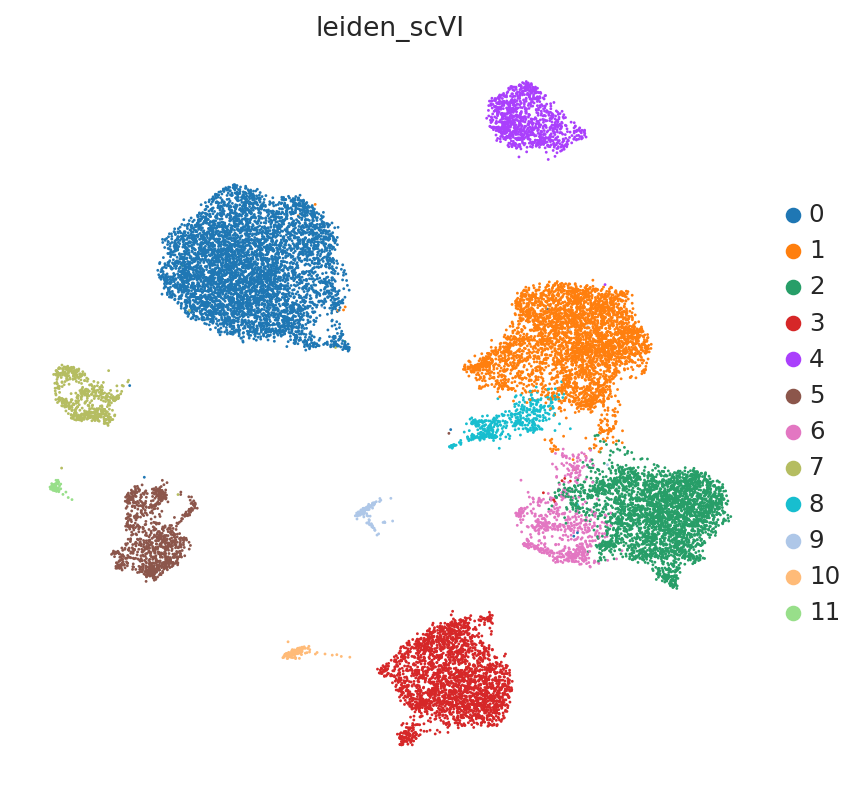

In [29]:
sc.pl.umap(
    adata,
    color=[SCVI_CLUSTERS_KEY],
    frameon=False,
)

In [30]:
adata.obs.cell_type

,cell_type
AACTCCCCACGAGAGT-1-HCAHeart7844001,Myeloid
ATAACGCAGAGCTGGT-1-HCAHeart7829979,Ventricular_Cardiomyocyte
GTCAAGTCATGCCACG-1-HCAHeart7702879,Fibroblast
GGTGATTCAAATGAGT-1-HCAHeart8102858,Endothelial
AGAGAATTCTTAGCAG-1-HCAHeart8102863,Endothelial
...,...
CGTCAGGCAAGGCTCC-1-HCAHeart7985087,Ventricular_Cardiomyocyte
AGTCACAAGACGAGCT-1-H0035_RV,Pericytes
GGTGAAGGTTCCACAA-1-HCAHeart7844001,Lymphoid
CAGCTAAGTACAGACG-1-HCAHeart7702876,Atrial_Cardiomyocyte


In [31]:
de_df = model.differential_expression(
    groupby="cell_type", group1="Endothelial", group2="Fibroblast"
)
de_df.head()

DE...: 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
S1PR1,0.9994,0.0006,7.417964,0.001583,0.000050,0.0,0.25,5.226385,5.243856,1.561563,...,1.048425,0.006132,0.436603,0.005315,15.851131,0.151822,True,Endothelial vs Fibroblast,Endothelial,Fibroblast
HLA-DRB5,0.9986,0.0014,6.569875,0.001802,0.000044,0.0,0.25,5.914286,5.991719,1.999849,...,1.206135,0.006541,0.422000,0.005724,16.950226,0.285507,True,Endothelial vs Fibroblast,Endothelial,Fibroblast
LPAR1,0.9984,0.0016,6.436144,0.000053,0.002818,0.0,0.25,-7.258140,-7.556012,2.449445,...,0.004867,0.555599,0.004137,0.312347,0.220663,31.633068,True,Endothelial vs Fibroblast,Endothelial,Fibroblast
CDH19,0.9980,0.0020,6.212601,0.000281,0.012771,0.0,0.25,-7.305181,-7.563086,2.591213,...,0.049890,3.217938,0.014359,0.672527,2.162845,164.416077,True,Endothelial vs Fibroblast,Endothelial,Fibroblast
PCAT19,0.9978,0.0022,6.117091,0.001753,0.000054,0.0,0.25,5.482974,5.495405,1.970374,...,0.919439,0.006132,0.407155,0.004906,16.972265,0.297653,True,Endothelial vs Fibroblast,Endothelial,Fibroblast


In [32]:
de_df = model.differential_expression(
    groupby="cell_type",
)
de_df.head()

DE...: 100%|██████████| 11/11 [00:11<00:00,  1.03s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
CIDEC,0.9990,0.0010,6.906745,0.002232,0.000033,0.0,0.25,7.234888,7.124249,2.776655,...,1.137931,0.001406,0.510345,0.001406,26.647764,0.094857,True,Adipocytes vs Rest,Adipocytes,Rest
PLIN1,0.9982,0.0018,6.318161,0.005092,0.000064,0.0,0.25,7.944744,7.452519,3.364415,...,2.799999,0.004379,0.806897,0.004325,63.263275,0.342205,True,Adipocytes vs Rest,Adipocytes,Rest
DGAT2,0.9980,0.0020,6.212601,0.004110,0.000054,0.0,0.25,6.802300,6.821091,2.581632,...,2.682757,0.005028,0.593103,0.004866,51.829231,0.362526,True,Adipocytes vs Rest,Adipocytes,Rest
FASN,0.9978,0.0022,6.117091,0.012989,0.000226,0.0,0.25,6.424646,6.396906,2.283985,...,7.062068,0.025086,0.841379,0.022167,151.881088,1.575753,True,Adipocytes vs Rest,Adipocytes,Rest
GPAM,0.9972,0.0028,5.875328,0.027569,0.000401,0.0,0.25,6.805201,6.631560,2.710565,...,17.372416,0.035791,0.896552,0.031520,333.510529,3.314389,True,Adipocytes vs Rest,Adipocytes,Rest


In [34]:
markers = {}
cats = adata.obs.cell_type.cat.categories
for c in cats:
    cid = f"{c} vs Rest"
    cell_type_df = de_df.loc[de_df.comparison == cid]

    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]

    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 3]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]

    markers[c] = cell_type_df.index.tolist()[:3]

In [36]:
sc.tl.dendrogram(adata, groupby="cell_type", use_rep="X_scVI")

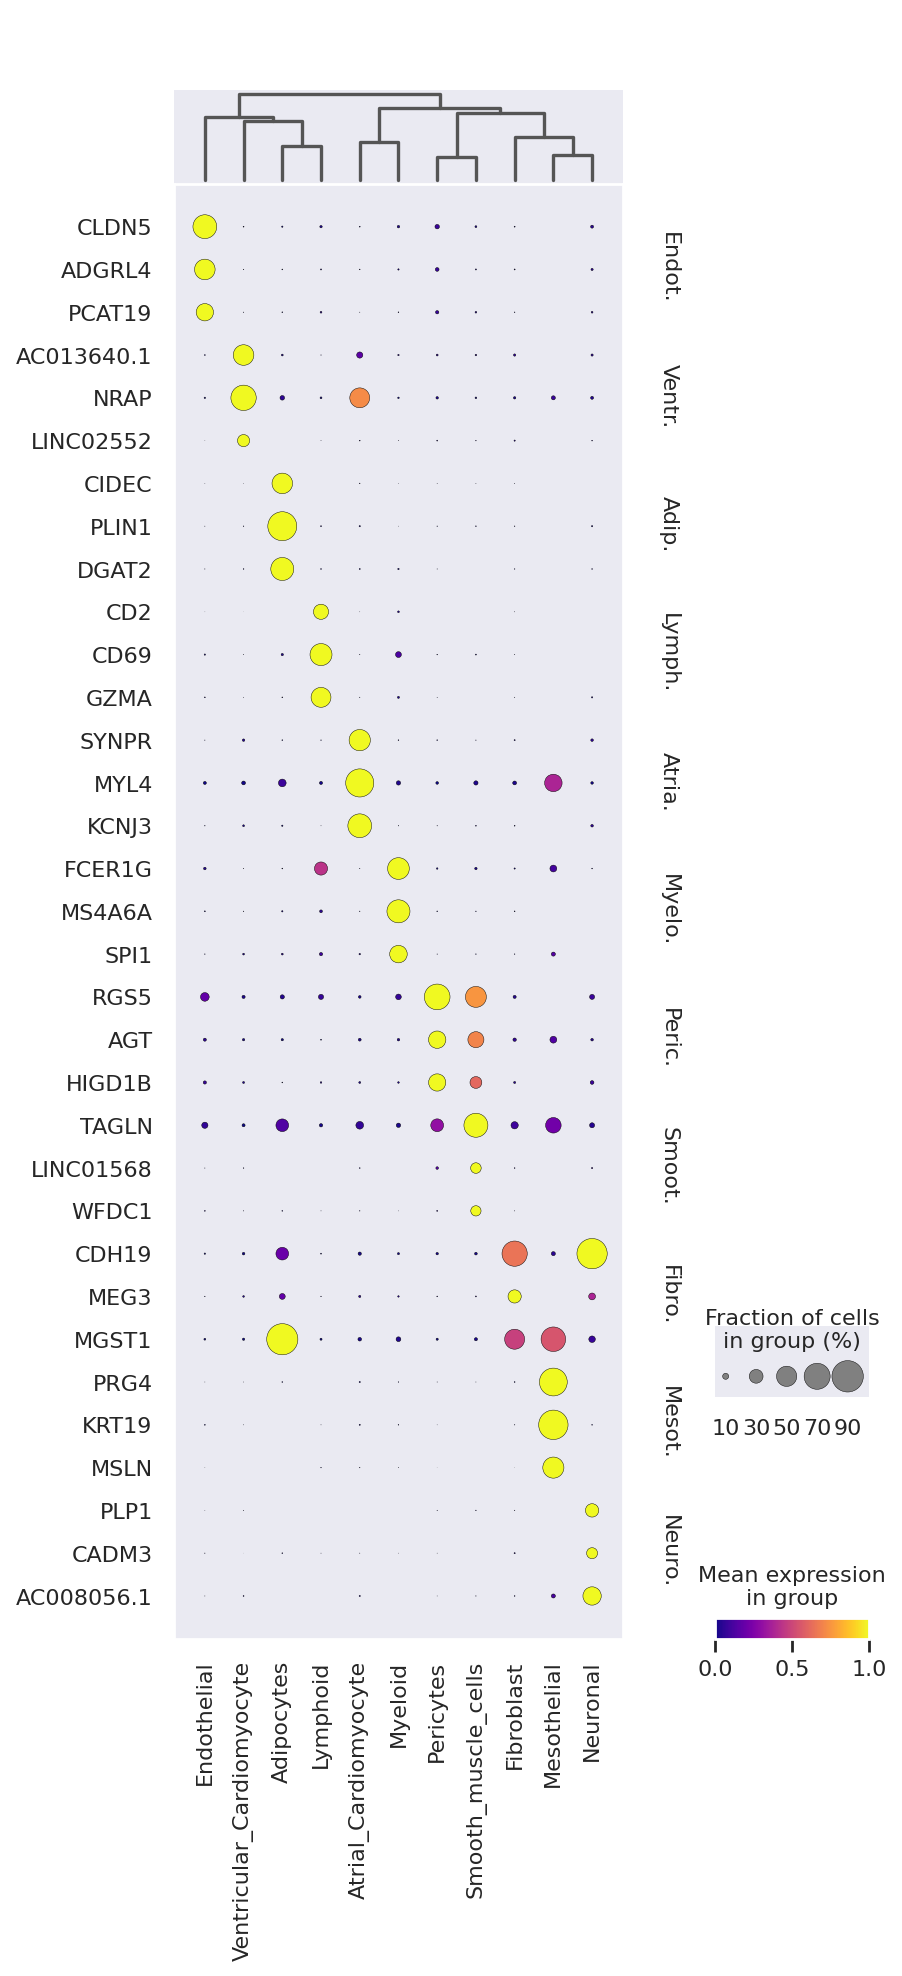

In [39]:
sc.pl.dotplot(
    adata,
    markers,
    groupby="cell_type",
    dendrogram=True,
    color_map="plasma",
    swap_axes=True,
    use_raw=True,
    standard_scale="var",
)

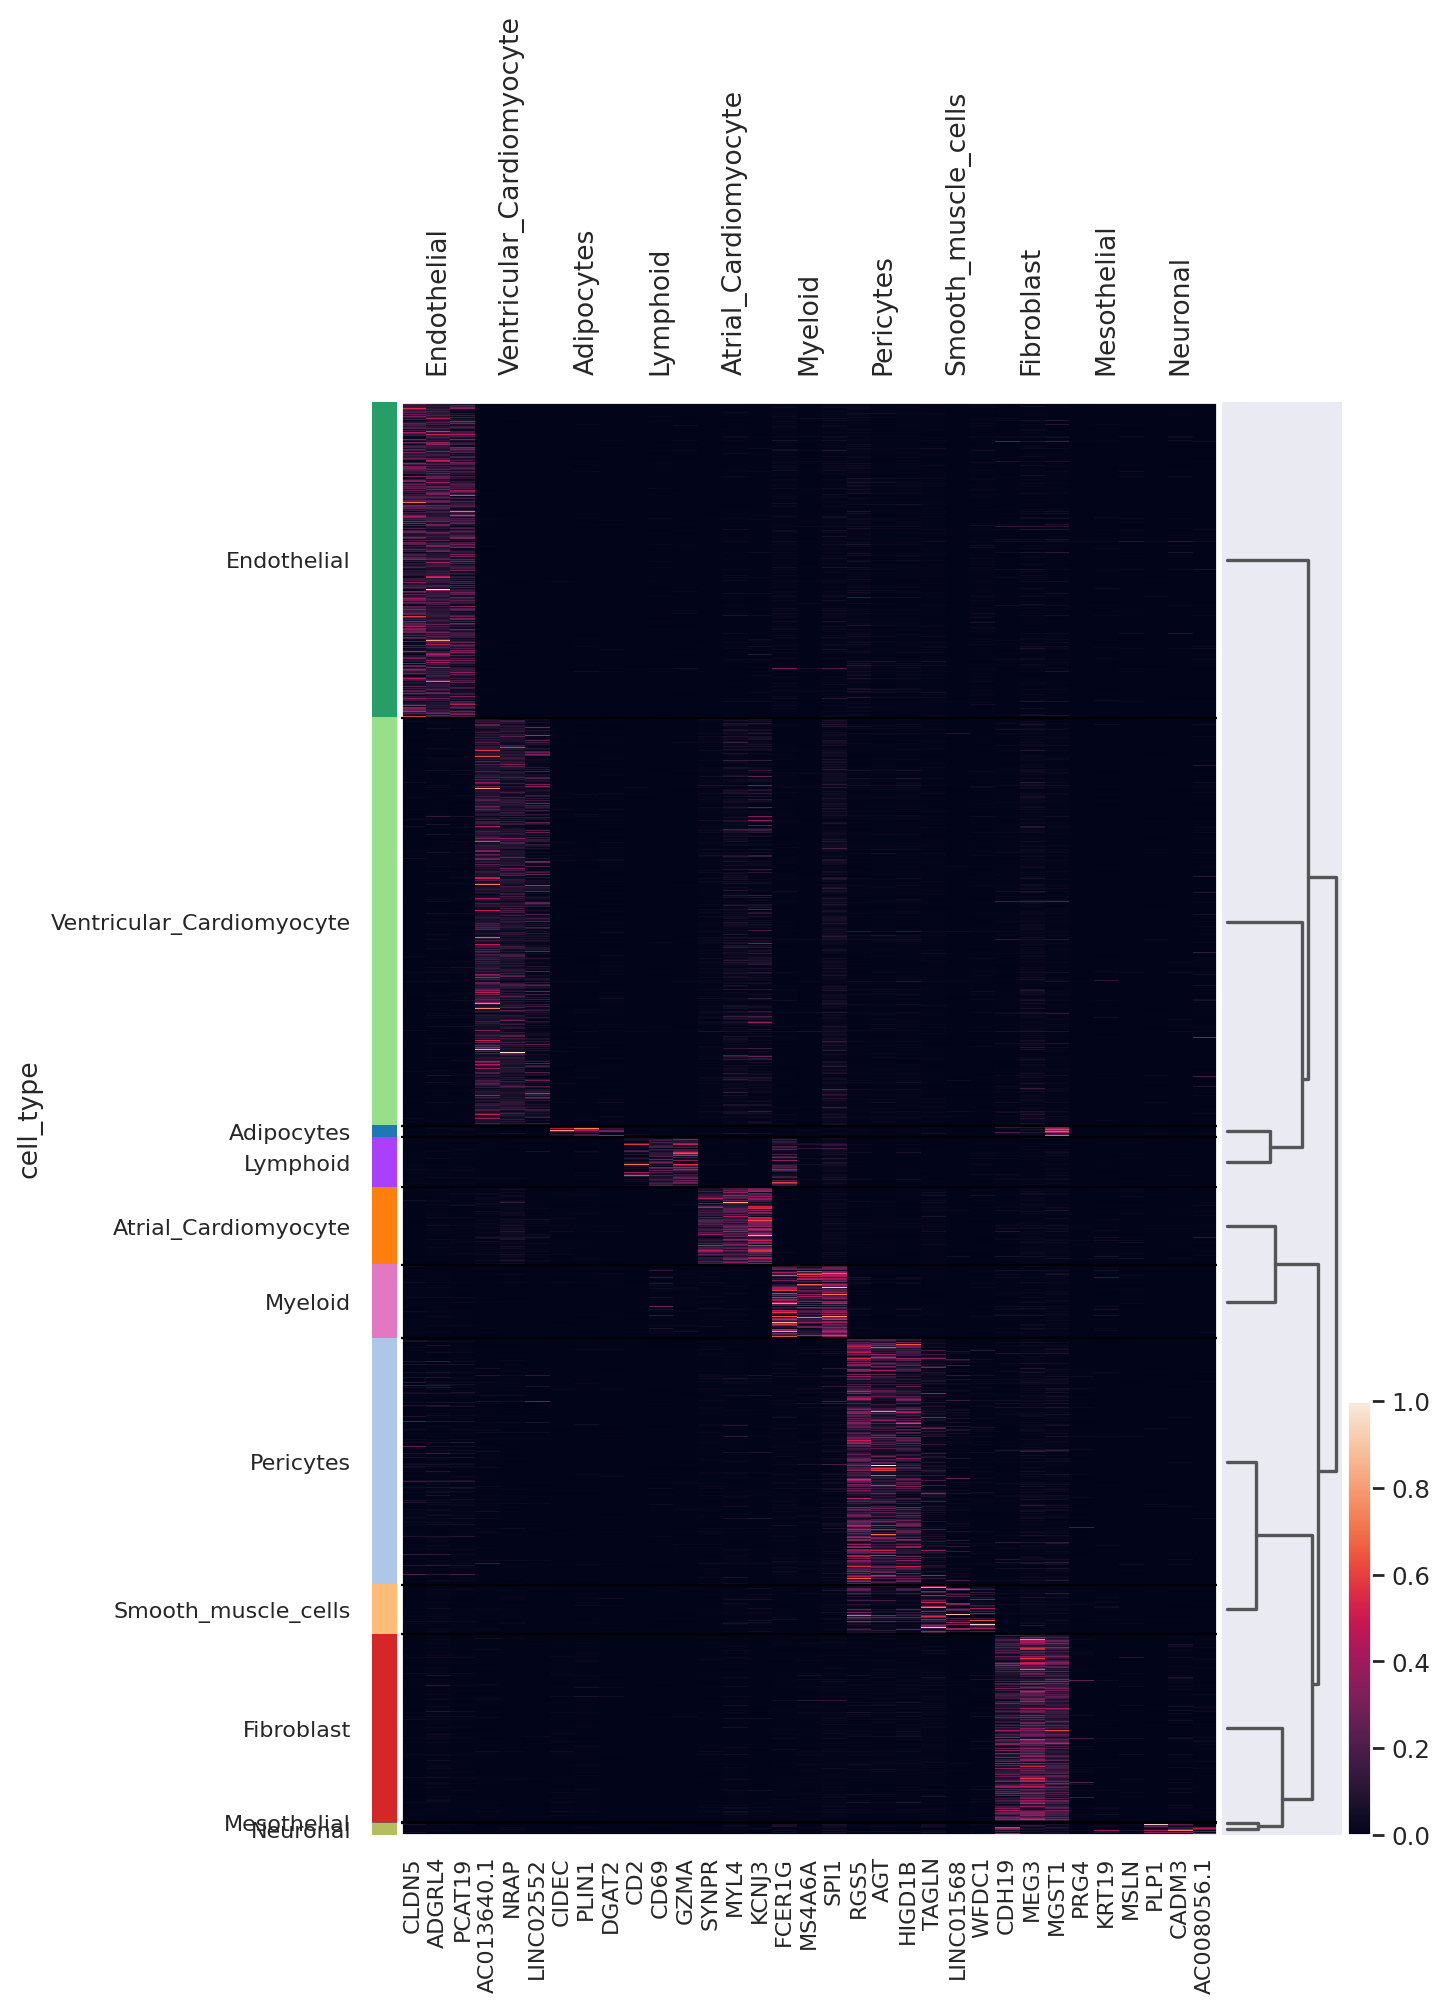

In [40]:
sc.pl.heatmap(
    adata,
    markers,
    groupby="cell_type",
    layer="scvi_normalized",
    standard_scale="var",
    dendrogram=True,
    figsize=(8, 12),
)